<a href="https://colab.research.google.com/github/pallavi232003/kkonnect.io/blob/main/KKonnect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [4]:
from google.colab import files
uploaded=files.upload()

Saving cnc_parts_data.csv to cnc_parts_data.csv


## **DATA EXPLORING**

In [5]:

df = pd.read_csv('cnc_parts_data.csv')
df.head()


,Part Name,Material,Length_mm,Width_mm,Height_mm,Volume_mm3,Feature_Count,Estimated_Time_min,Estimated_Cost_USD
0,Part_001,Titanium,190.64,149.08,123.75,3517050.64,7,3529.18,351721.94
1,Part_002,Brass,174.57,124.21,144.53,3133893.09,6,3146.01,219387.36
2,Part_003,Steel,44.55,44.85,67.81,135488.96,6,143.83,8144.94
3,Part_004,Titanium,195.01,54.23,27.22,287862.18,3,295.58,28795.18
4,Part_005,Aluminum,18.83,125.43,42.40,100142.31,7,110.60,5025.23


In [8]:
df.shape

(150, 9)

In [9]:
df.size

1350

In [10]:
df.columns

Index(['Part Name', 'Material', 'Length_mm', 'Width_mm', 'Height_mm',
       'Volume_mm3', 'Feature_Count', 'Estimated_Time_min',
       'Estimated_Cost_USD'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Part Name           150 non-null    object 
 1   Material            150 non-null    object 
 2   Length_mm           150 non-null    float64
 3   Width_mm            150 non-null    float64
 4   Height_mm           150 non-null    float64
 5   Volume_mm3          150 non-null    float64
 6   Feature_Count       150 non-null    int64  
 7   Estimated_Time_min  150 non-null    float64
 8   Estimated_Cost_USD  150 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 10.7+ KB


In [6]:
df.describe()

,Length_mm,Width_mm,Height_mm,Volume_mm3,Feature_Count,Estimated_Time_min,Estimated_Cost_USD
count,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000
mean,106.790133,99.174333,112.685800,1.208983e+06,4.746667,1218.969067,76726.288000
std,56.083809,53.704142,53.288522,1.157765e+06,2.544072,1157.684223,82659.221849
min,10.520000,11.050000,10.100000,5.503910e+03,1.000000,9.240000,387.790000
25%,54.405000,53.982500,71.270000,3.141937e+05,2.000000,324.522500,19777.772500
50%,105.150000,92.335000,115.060000,9.162688e+05,5.000000,928.245000,51497.200000
75%,154.555000,141.347500,156.380000,1.652237e+06,7.000000,1657.637500,104543.232500
max,199.570000,194.220000,199.560000,5.590912e+06,9.000000,5597.430000,429734.700000


In [12]:
df.isnull().sum()

,0
Part Name,0
Material,0
Length_mm,0
Width_mm,0
Height_mm,0
Volume_mm3,0
Feature_Count,0
Estimated_Time_min,0
Estimated_Cost_USD,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
cat_cols = df.select_dtypes(include=['object' , 'category']).columns
num_cols = df.select_dtypes(exclude=['object' , 'category']).columns
print("Categorical Columns:",list(cat_cols))
print("Numerical Columns:", list(num_cols))

Categorical Columns: ['Part Name', 'Material']
Numerical Columns: ['Length_mm', 'Width_mm', 'Height_mm', 'Volume_mm3', 'Feature_Count', 'Estimated_Time_min', 'Estimated_Cost_USD']


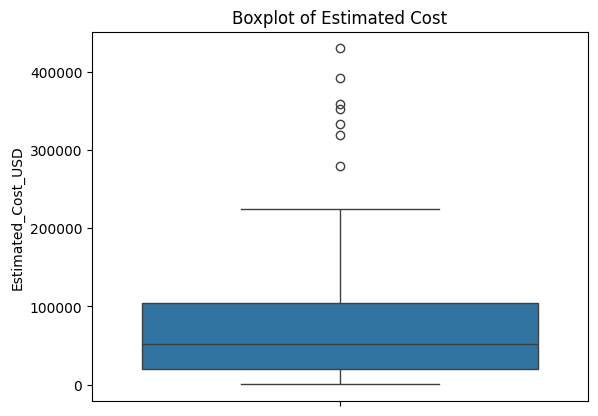

In [18]:
sns.boxplot(df['Estimated_Cost_USD'])
plt.title("Boxplot of Estimated Cost")
plt.show()

In [19]:
Q1 = df['Estimated_Cost_USD'].quantile(0.25)
Q3 = df['Estimated_Cost_USD'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df['Estimated_Cost_USD'] >= lower_bound) & (df['Estimated_Cost_USD'] <= upper_bound)]

print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(df_filtered)}")


Original rows: 150
Filtered rows: 143


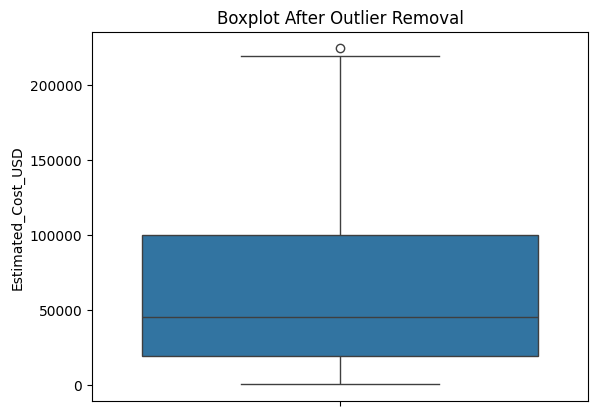

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y='Estimated_Cost_USD', data=df_filtered)
plt.title("Boxplot After Outlier Removal")
plt.show()


## Feature Engineering


It helps compare efficiency across different materials or designs.



In [22]:
df['Cost_per_mm3'] = df['Estimated_Cost_USD'] / df['Volume_mm3']

 This ratio is relevant for understanding machining complexity — parts with high surface area relative to volume may require more tool changes or precision wor

In [23]:
df['Surface_Area'] = 2 * (df['Length_mm']*df['Width_mm'] + df['Width_mm']*df['Height_mm'] + df['Length_mm']*df['Height_mm'])
df['SA_to_Volume'] = df['Surface_Area'] / df['Volume_mm3']

In [24]:
df[['Cost_per_mm3', 'Surface_Area', 'SA_to_Volume']].describe()

,Cost_per_mm3,Surface_Area,SA_to_Volume
count,150.000000,150.000000,150.000000
mean,0.065445,68011.208607,0.091229
std,0.023414,41211.705107,0.055013
min,0.030001,1955.218200,0.033874
25%,0.050011,34895.292300,0.053209
50%,0.060116,62465.303600,0.073048
75%,0.070442,92112.650400,0.109216
max,0.100154,189385.836800,0.355242


## Visualization

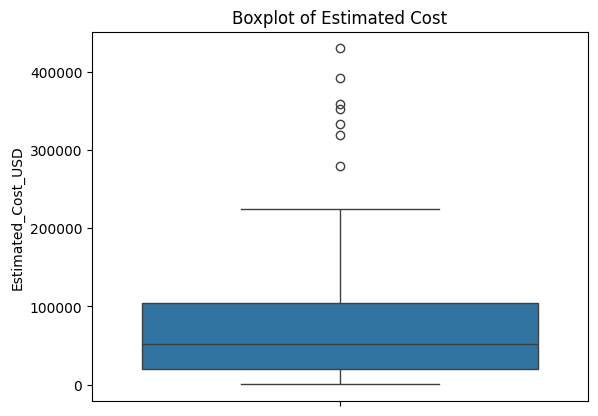

In [28]:
sns.boxplot(df['Estimated_Cost_USD'])
plt.title("Boxplot of Estimated Cost")
plt.show()

In [29]:
Q1 = df['Estimated_Cost_USD'].quantile(0.25)
Q3 = df['Estimated_Cost_USD'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Estimated_Cost_USD'] >= lower_bound) & (df['Estimated_Cost_USD'] <= upper_bound)]

print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(df_filtered)}")


Original rows: 150
Filtered rows: 143


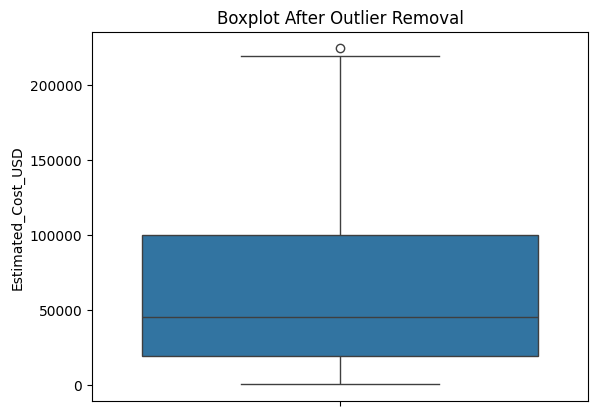

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y='Estimated_Cost_USD', data=df_filtered)
plt.title("Boxplot After Outlier Removal")
plt.show()

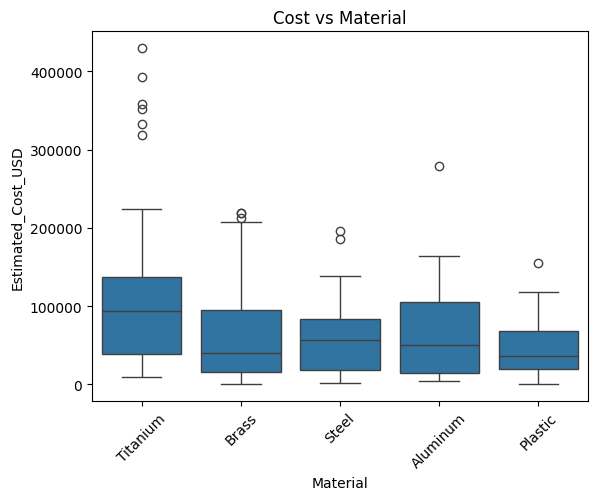

In [26]:

sns.boxplot(x='Material', y='Estimated_Cost_USD', data=df)
plt.title('Cost vs Material')
plt.xticks(rotation=45)
plt.show()

In [27]:
def remove_outliers_by_material(df, group_col, target_col):
    df_cleaned = pd.DataFrame()
    for material in df[group_col].unique():
        group = df[df[group_col] == material]
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered = group[(group[target_col] >= lower) & (group[target_col] <= upper)]
        df_cleaned = pd.concat([df_cleaned, filtered], axis=0)
    return df_cleaned.reset_index(drop=True)

# Apply function
df_filtered_by_material = remove_outliers_by_material(df, 'Material', 'Estimated_Cost_USD')


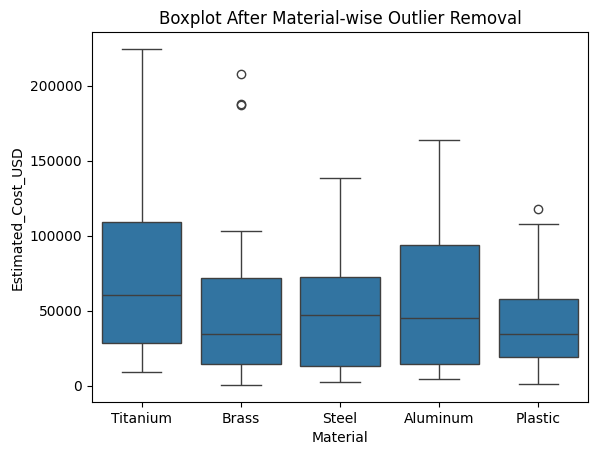

In [31]:
sns.boxplot(x='Material', y='Estimated_Cost_USD', data=df_filtered_by_material)
plt.title("Boxplot After Material-wise Outlier Removal")
plt.show()

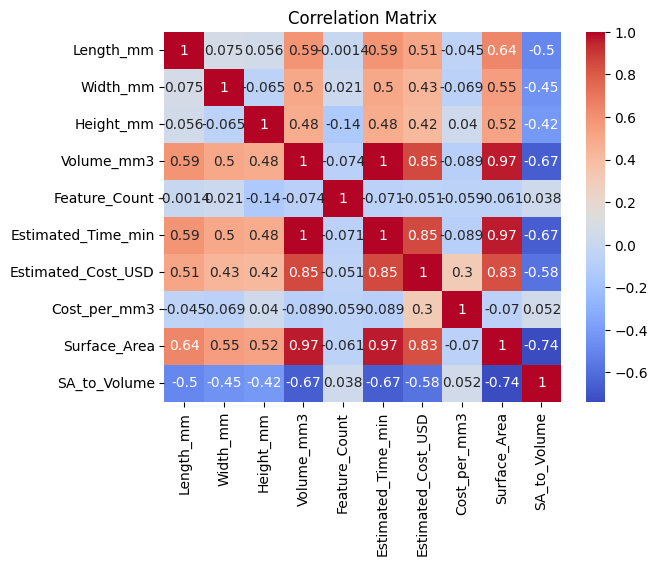

In [32]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

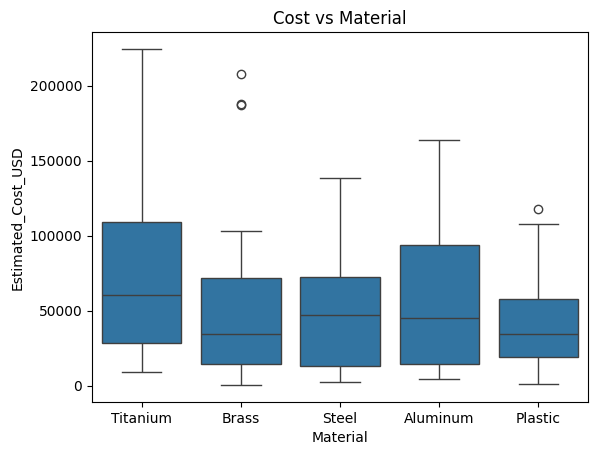

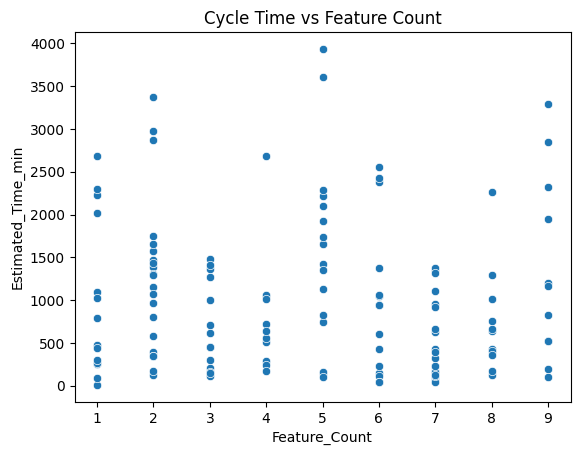

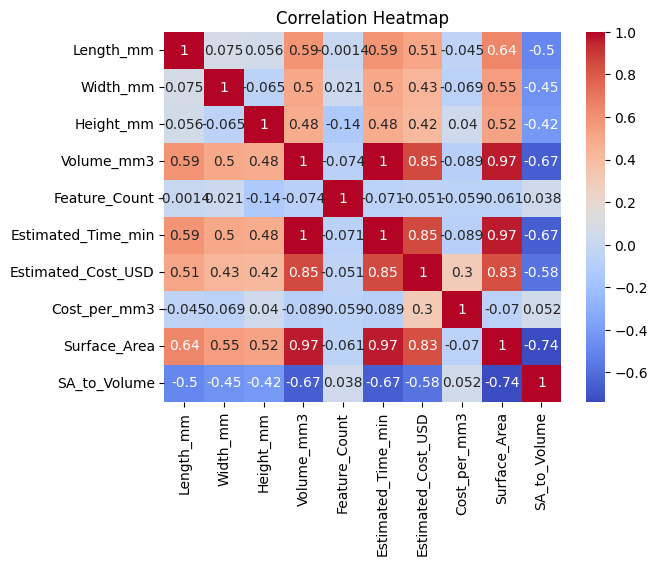

In [37]:
sns.boxplot(x='Material', y='Estimated_Cost_USD', data=df_filtered_by_material)
plt.title('Cost vs Material')
plt.show()

sns.scatterplot(x='Feature_Count', y='Estimated_Time_min', data=df_filtered_by_material)
plt.title('Cycle Time vs Feature Count')
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Model Training & Evaluation**

In [52]:
df_encoded = pd.get_dummies(df, columns=['Material'], drop_first=True)

X = df_encoded.drop(columns=['Part Name', 'Estimated_Cost_USD', 'Estimated_Time_min', 'Log_Cost'])
y = df_encoded['Log_Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [54]:
model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [55]:
y_pred_log = model.predict(X_test)

y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 0.18
RMSE: 0.22


In [57]:
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 12528.40
RMSE: 20660.06


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


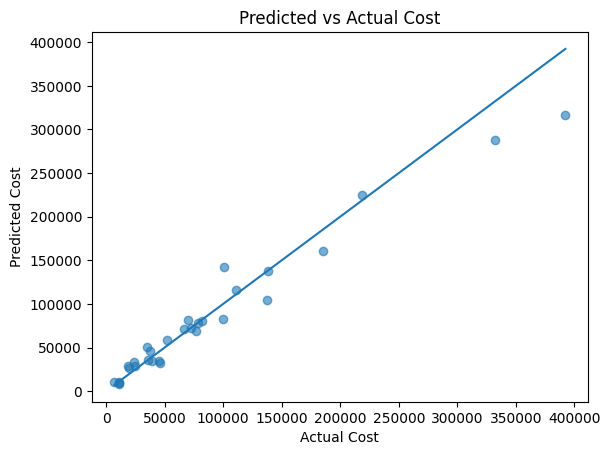

In [58]:
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Cost")
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()],)
plt.show()


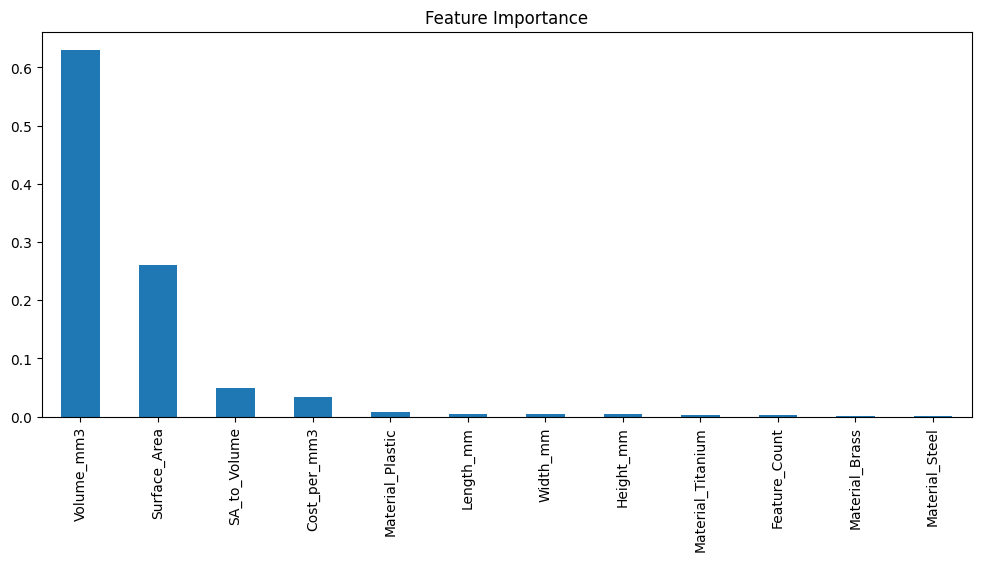

In [44]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Feature Importance")
plt.show()